# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [8]:
import pandas as pd
import numpy as np
np.int = int

files = {
    "Panama City": "data/PanamaCityWeather.csv",
    "Gainesville": "data/GainsvilleWeather.csv",
    "Miami": "data/MiamiWeather.csv",
    "Orlando": "data/OrlandoWeather.csv",
    "Tampa": "data/TampaWeather.csv"
}
dfs = []
for city, file_path in files.items():
    df = pd.read_csv(file_path)
    df['City'] = city
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)
#clean up white spaces
combined_df.columns = combined_df.columns.str.strip()
# change -99 to nan to rmeove later
combined_df.replace([-99.9, -99.99], np.nan, inplace=True)

combined_df['Date'] = pd.to_datetime(
    combined_df[['YEAR', 'MONTH', 'DAY']].rename(columns={
        'YEAR': 'year', 'MONTH': 'month', 'DAY': 'day'
    }),
    errors='coerce'
)
# remove any of the -99
combined_df.dropna(subset=['Date'], inplace=True)
#remove any of the -99
combined_df_clean = combined_df.dropna(subset=["PRECIPITATION", "MAX TEMP", "MIN TEMP", "MEAN TEMP"])

combined_df_clean.reset_index(drop=True, inplace=True)

print(combined_df_clean.head())


   COOPID  YEAR  MONTH  DAY  PRECIPITATION  MAX TEMP  MIN TEMP  MEAN TEMP  \
0   83326  1960      5   17            0.0      90.0      64.0       77.0   
1   83326  1960      5   18            0.0      92.0      62.0       77.0   
2   83326  1960      5   19            0.0      94.0      59.0       76.5   
3   83326  1960      5   20            0.0      89.0      68.0       78.5   
4   83326  1960      5   21            0.0      91.0      65.0       78.0   

          City       Date  
0  Panama City 1960-05-17  
1  Panama City 1960-05-18  
2  Panama City 1960-05-19  
3  Panama City 1960-05-20  
4  Panama City 1960-05-21  


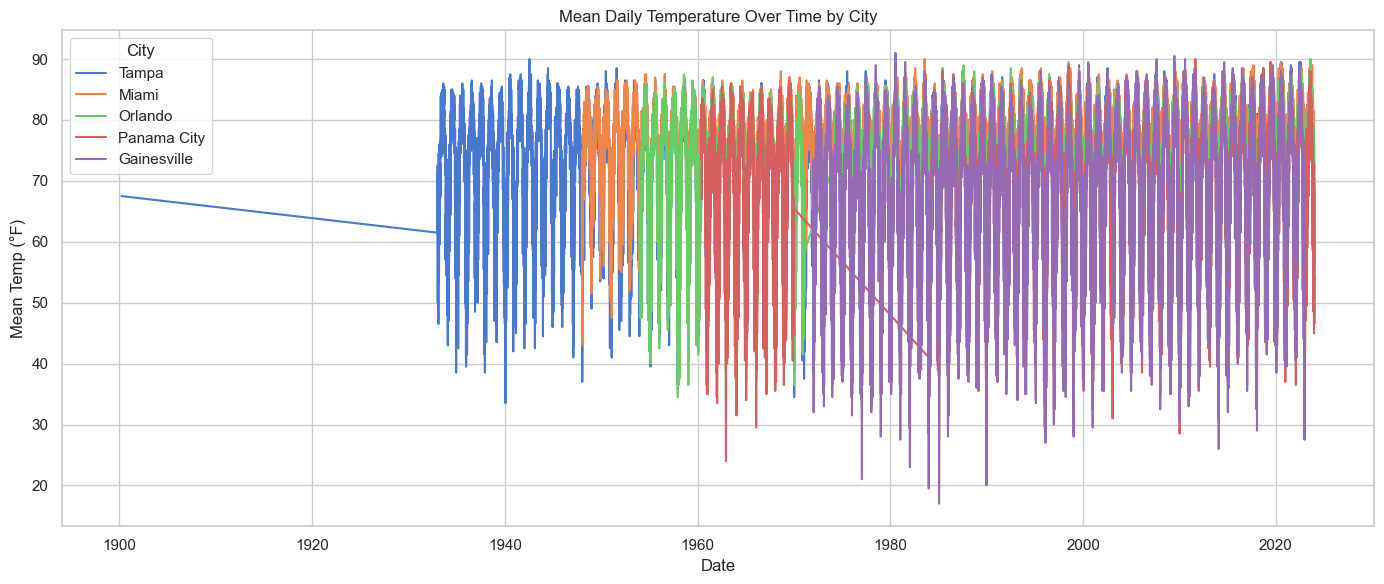

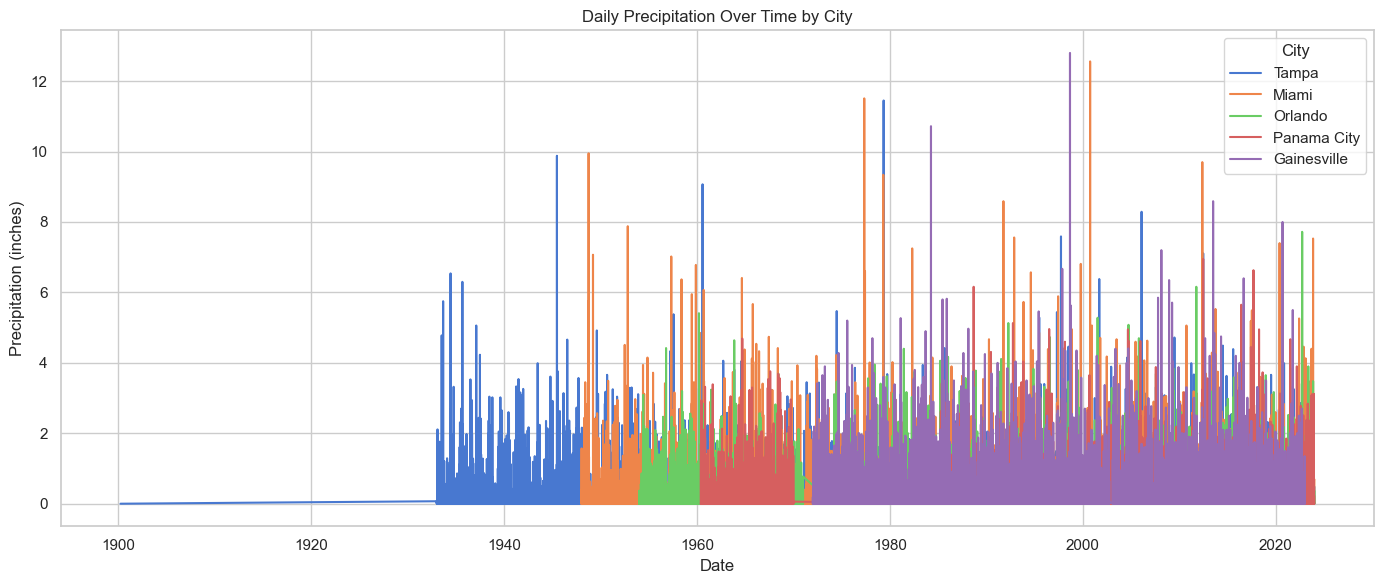

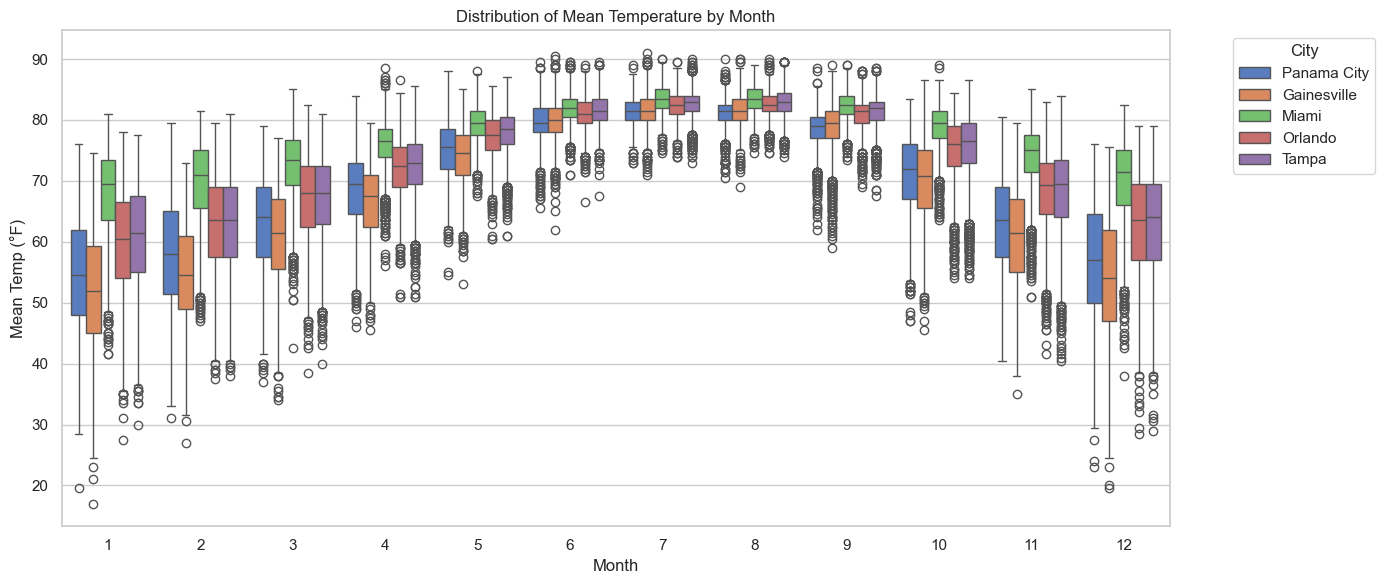

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12, 6)

city_daily_avg = combined_df_clean.groupby(['Date', 'City']).agg({
    'PRECIPITATION': 'mean',
    'MEAN TEMP': 'mean',
    'MAX TEMP': 'mean',
    'MIN TEMP': 'mean'
}).reset_index()

#mean temp over time but again doesnt look great
plt.figure(figsize=(14, 6))
sns.lineplot(data=city_daily_avg, x='Date', y='MEAN TEMP', hue='City')
plt.title("Mean Daily Temperature Over Time by City")
plt.xlabel("Date")
plt.ylabel("Mean Temp (°F)")
plt.legend(title='City')
plt.tight_layout()
plt.show()

#precipitation over time but it doesnt look great
plt.figure(figsize=(14, 6))
sns.lineplot(data=city_daily_avg, x='Date', y='PRECIPITATION', hue='City')
plt.title("Daily Precipitation Over Time by City")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.legend(title='City')
plt.tight_layout()
plt.show()


combined_df_clean = combined_df_clean.copy()
#box plot of temp by month idk if this helps?
combined_df_clean['Month'] = combined_df_clean['Date'].dt.month

plt.figure(figsize=(14, 6))
sns.boxplot(data=combined_df_clean, x='Month', y='MEAN TEMP', hue='City')
plt.title("Distribution of Mean Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Mean Temp (°F)")
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



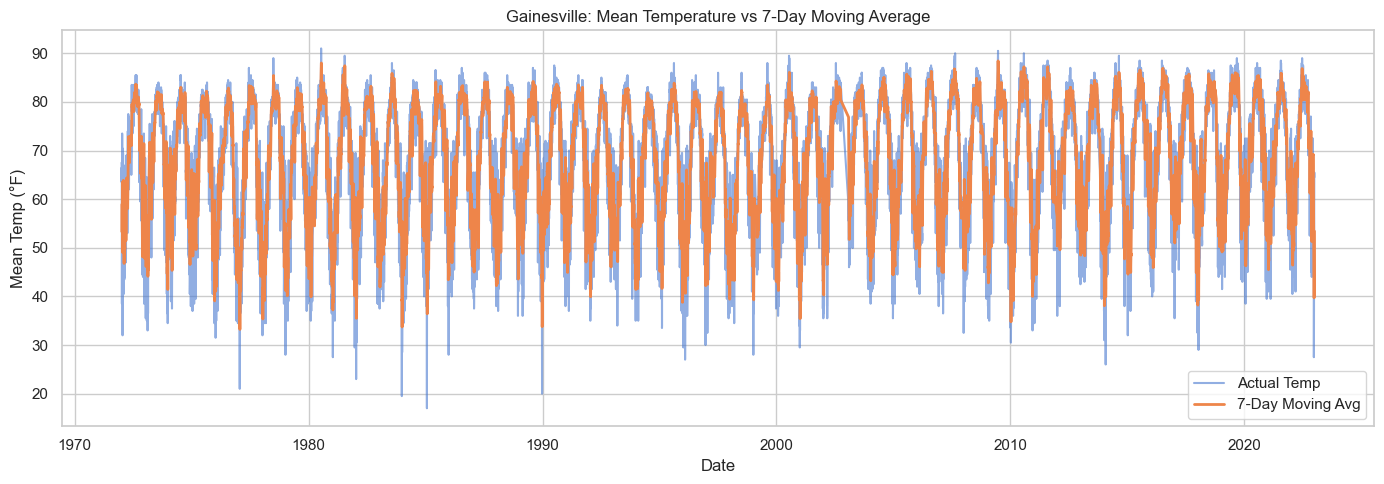

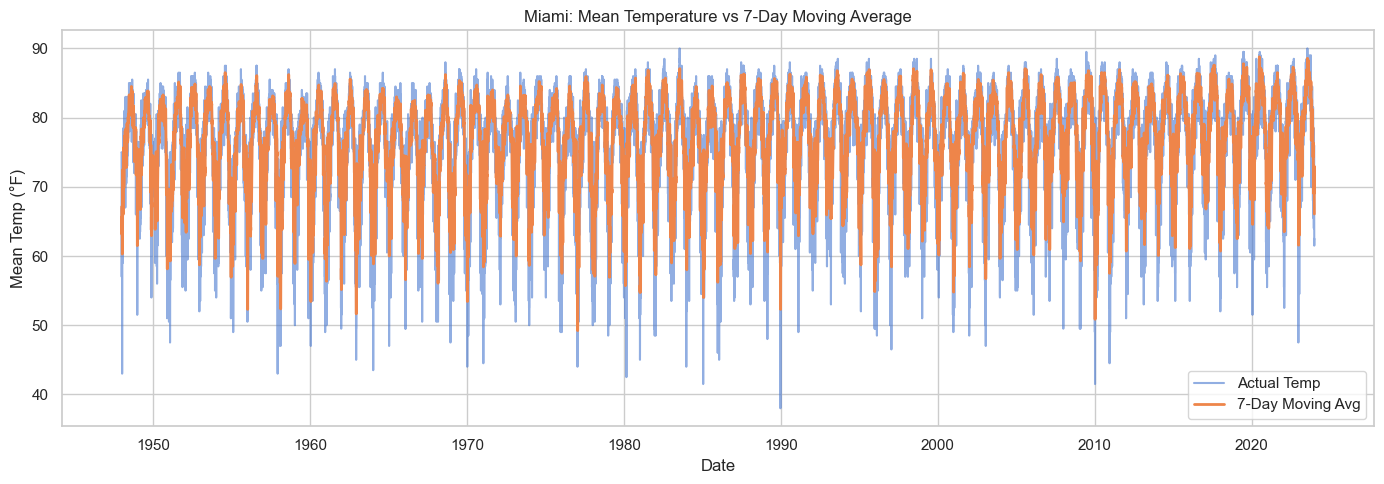

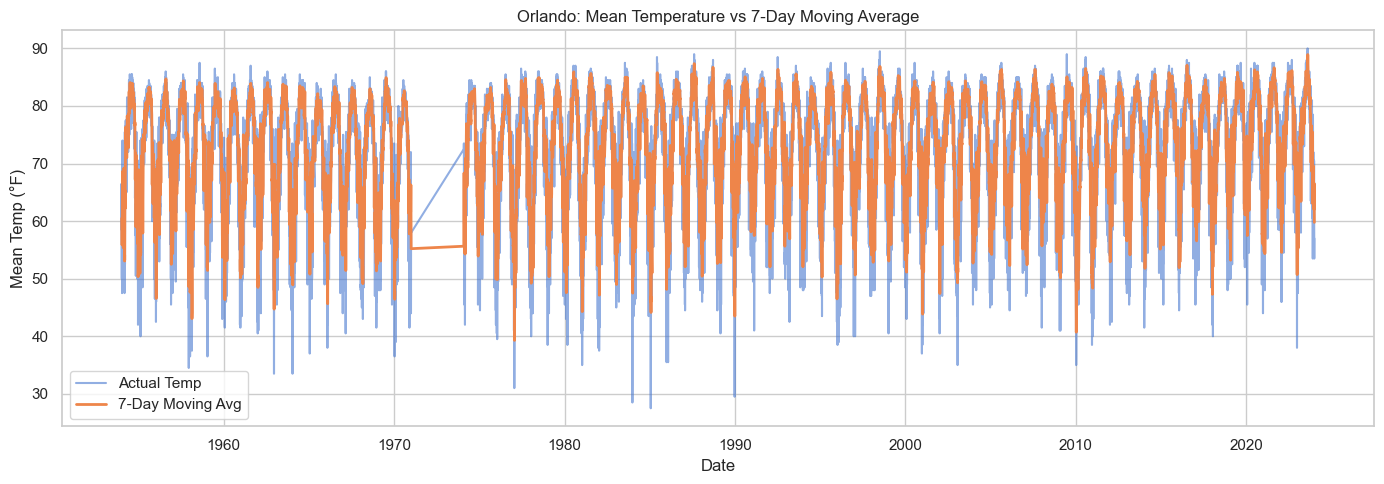

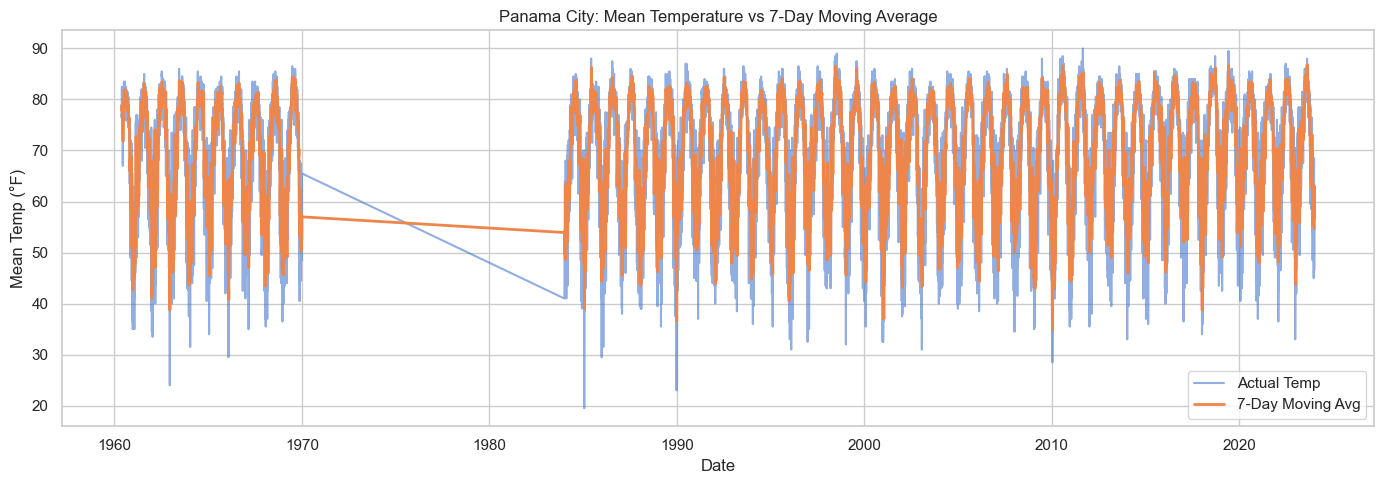

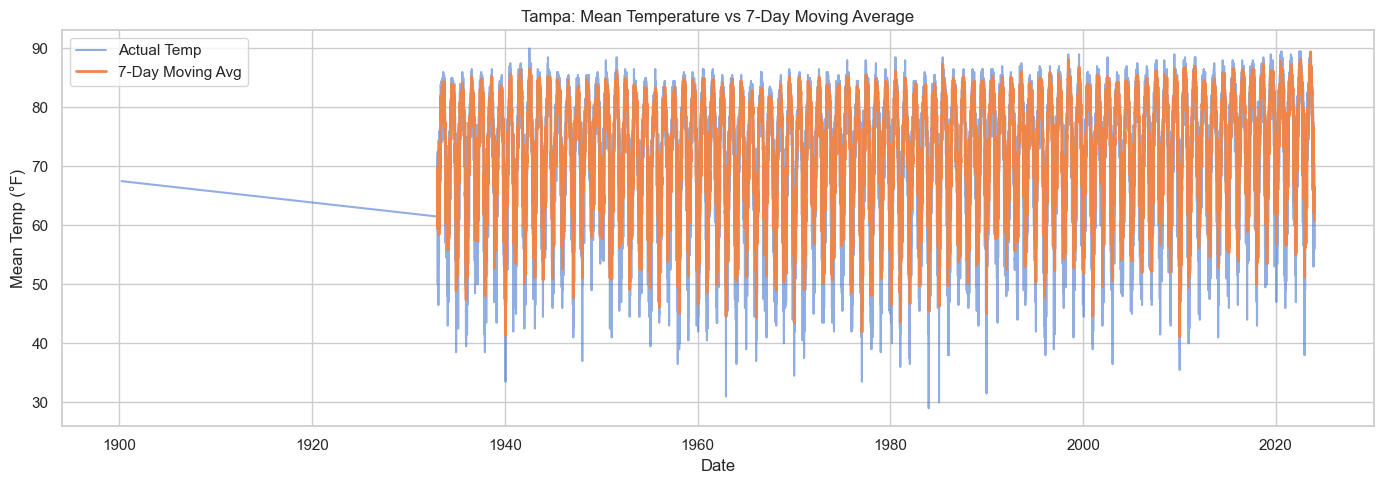

In [10]:
#7 day moving average for each of the cities
city_ma_df = combined_df_clean.copy()
city_ma_df.sort_values(by=["City", "Date"], inplace=True)

city_ma_df["TEMP_7D_MA"] = city_ma_df.groupby("City")["MEAN TEMP"].transform(lambda x: x.rolling(window=7).mean())
city_ma_df["PRECIP_7D_MA"] = city_ma_df.groupby("City")["PRECIPITATION"].transform(lambda x: x.rolling(window=7).mean())

cities = city_ma_df["City"].unique()

for city in cities:
    city_data = city_ma_df[city_ma_df["City"] == city]
    plt.figure(figsize=(14, 5))
    sns.lineplot(data=city_data, x="Date", y="MEAN TEMP", label="Actual Temp", alpha=0.6)
    sns.lineplot(data=city_data, x="Date", y="TEMP_7D_MA", label="7-Day Moving Avg", linewidth=2)
    plt.title(f"{city}: Mean Temperature vs 7-Day Moving Average")
    plt.xlabel("Date")
    plt.ylabel("Mean Temp (°F)")
    plt.legend()
    plt.tight_layout()
    plt.show()


7-Day Moving Average Forecast for Panama City (Mean Temperature):
        Date  Forecasted_MEAN_TEMP
0 2024-01-02             54.642857
1 2024-01-03             54.642857
2 2024-01-04             54.642857
3 2024-01-05             54.642857
4 2024-01-06             54.642857
5 2024-01-07             54.642857
6 2024-01-08             54.642857


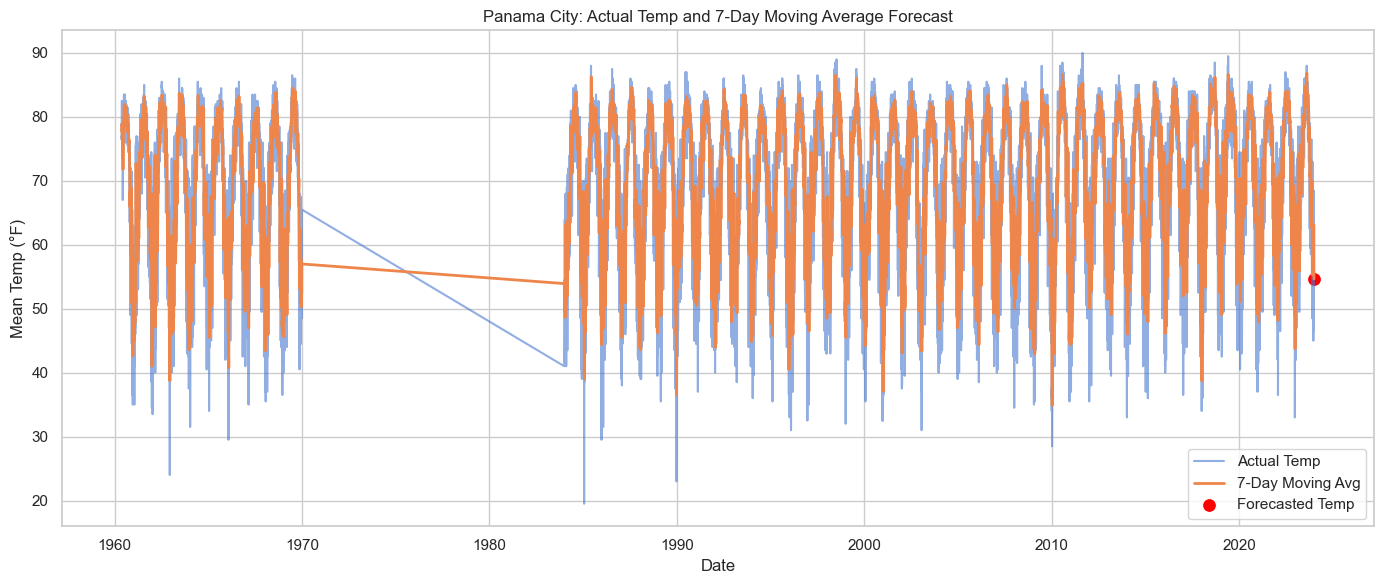

7-Day Moving Average Forecast for Gainesville (Mean Temperature):
        Date  Forecasted_MEAN_TEMP
0 2023-01-02             53.428571
1 2023-01-03             53.428571
2 2023-01-04             53.428571
3 2023-01-05             53.428571
4 2023-01-06             53.428571
5 2023-01-07             53.428571
6 2023-01-08             53.428571


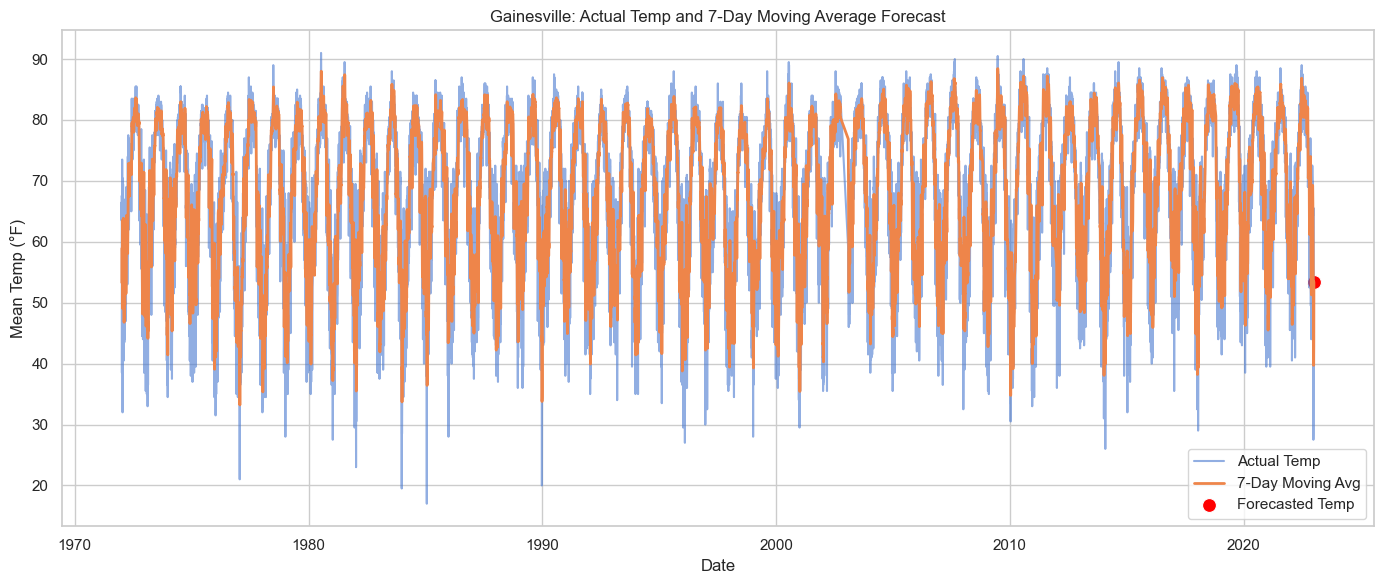

7-Day Moving Average Forecast for Miami (Mean Temperature):
        Date  Forecasted_MEAN_TEMP
0 2024-01-02             66.071429
1 2024-01-03             66.071429
2 2024-01-04             66.071429
3 2024-01-05             66.071429
4 2024-01-06             66.071429
5 2024-01-07             66.071429
6 2024-01-08             66.071429


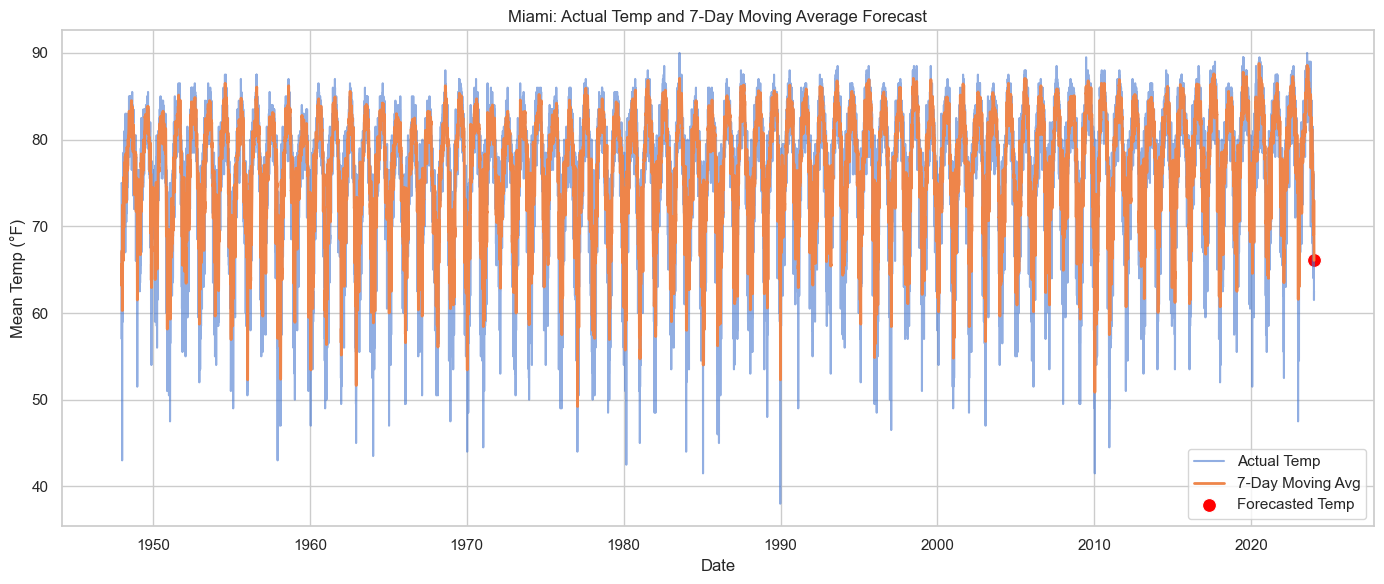

7-Day Moving Average Forecast for Orlando (Mean Temperature):
        Date  Forecasted_MEAN_TEMP
0 2024-01-02             59.785714
1 2024-01-03             59.785714
2 2024-01-04             59.785714
3 2024-01-05             59.785714
4 2024-01-06             59.785714
5 2024-01-07             59.785714
6 2024-01-08             59.785714


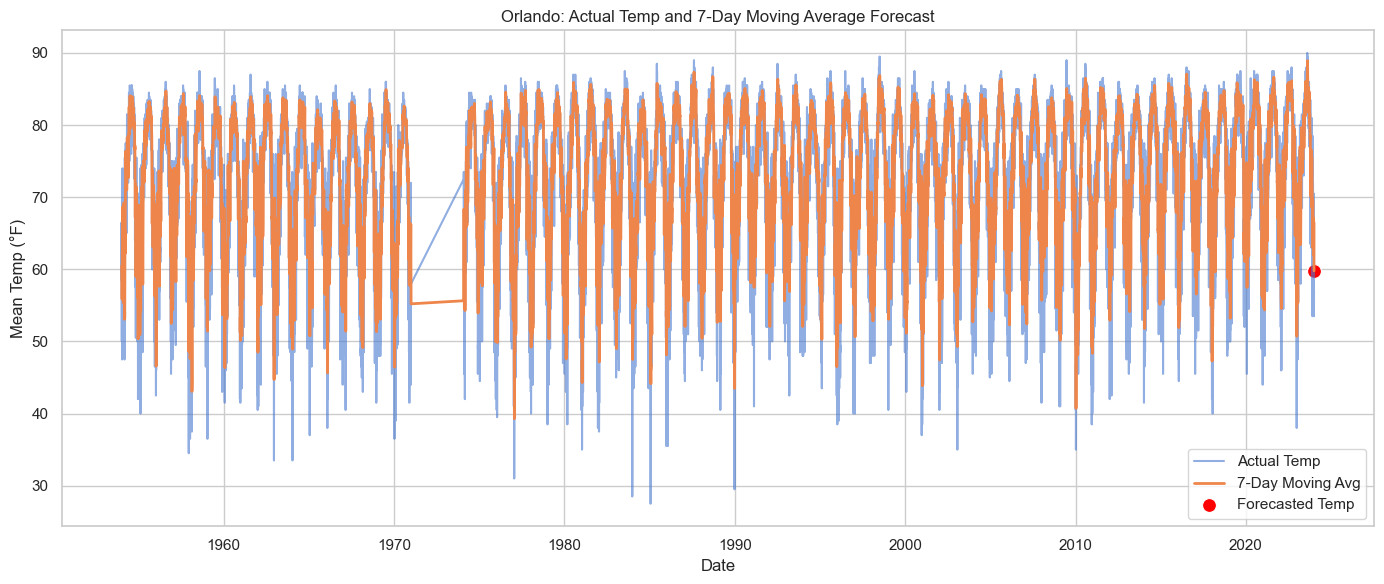

7-Day Moving Average Forecast for Tampa (Mean Temperature):
        Date  Forecasted_MEAN_TEMP
0 2024-01-02             60.785714
1 2024-01-03             60.785714
2 2024-01-04             60.785714
3 2024-01-05             60.785714
4 2024-01-06             60.785714
5 2024-01-07             60.785714
6 2024-01-08             60.785714


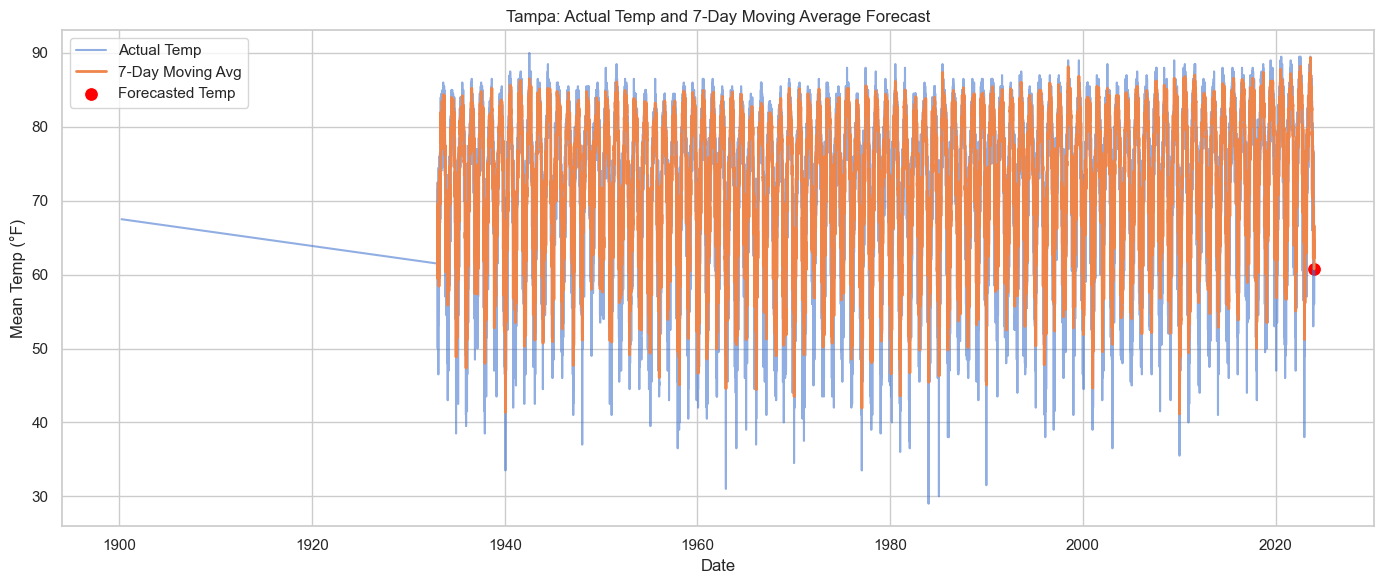

In [11]:
cities = combined_df_clean['City'].unique()

def forecast_with_moving_average(city_data, forecast_days=7):
    city_data = city_data.sort_values("Date")
    last_ma = city_data['TEMP_7D_MA'].iloc[-1]
    last_date = city_data['Date'].iloc[-1]
    #set up the forecast dates for predictions
    forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_days)
    forecast = pd.DataFrame({
        'Date': forecast_dates,
        'Forecasted_MEAN_TEMP': [last_ma] * forecast_days
    })
    return forecast

for city in cities:
    # moving average for each city
    city_data = city_ma_df[city_ma_df["City"] == city].copy().sort_values("Date")
    forecast = forecast_with_moving_average(city_data, forecast_days=7)

    print(f"7-Day Moving Average Forecast for {city} (Mean Temperature):")
    print(forecast)

    plt.figure(figsize=(14, 6))
    sns.lineplot(data=city_data, x="Date", y="MEAN TEMP", label="Actual Temp", alpha=0.6)
    sns.lineplot(data=city_data, x="Date", y="TEMP_7D_MA", label="7-Day Moving Avg", linewidth=2)
    sns.scatterplot(data=forecast, x="Date", y="Forecasted_MEAN_TEMP", color="red", label="Forecasted Temp", s=100)
    plt.title(f"{city}: Actual Temp and 7-Day Moving Average Forecast")
    plt.xlabel("Date")
    plt.ylabel("Mean Temp (°F)")
    plt.legend()
    plt.tight_layout()
    plt.show()

Linear Regression Model for Panama City:
  Coefficients: [0.02124473 0.01983153]
  Intercept: 25.577412926634523
  R-squared on test set: 0.02493297739136835
  Mean Squared Error (MSE): 116.9016



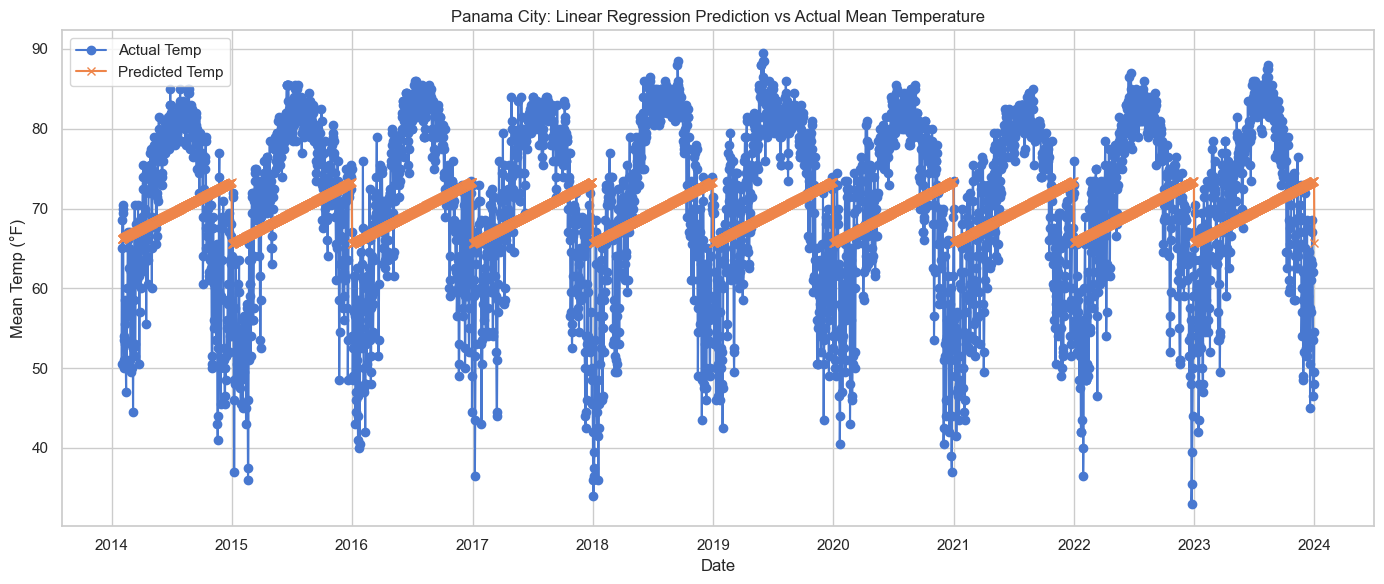

Linear Regression Model for Gainesville:
  Coefficients: [0.02717947 0.07382798]
  Intercept: -84.28404118858671
  R-squared on test set: 0.05342763834953723
  Mean Squared Error (MSE): 140.7215



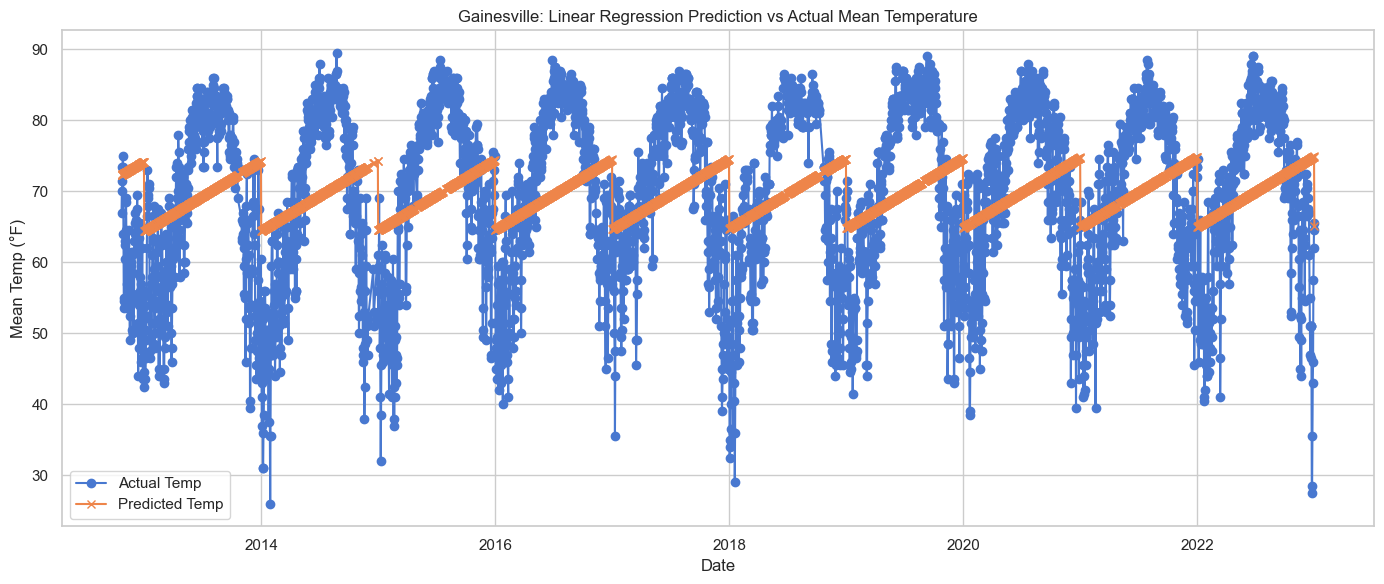

Linear Regression Model for Miami:
  Coefficients: [0.0174026  0.03928212]
  Intercept: -4.5863697132513295
  R-squared on test set: 0.06505126382378579
  Mean Squared Error (MSE): 43.9074



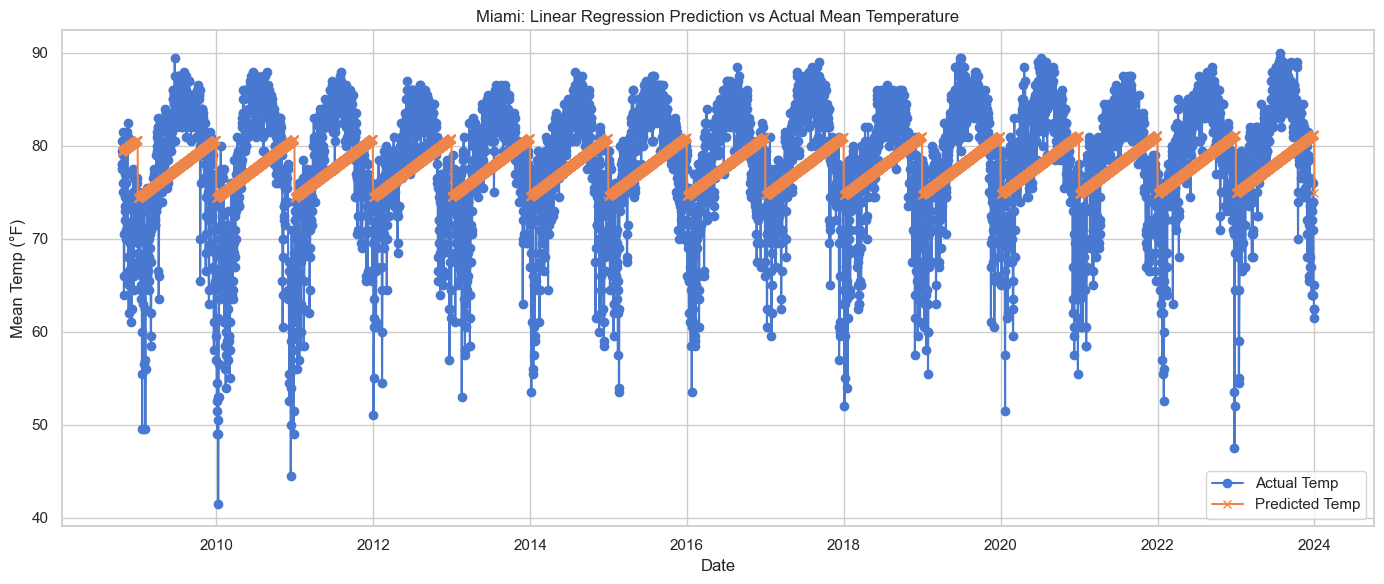

Linear Regression Model for Orlando:
  Coefficients: [0.02268514 0.03224884]
  Intercept: 4.269952696550092
  R-squared on test set: 0.030594887878618304
  Mean Squared Error (MSE): 81.1530



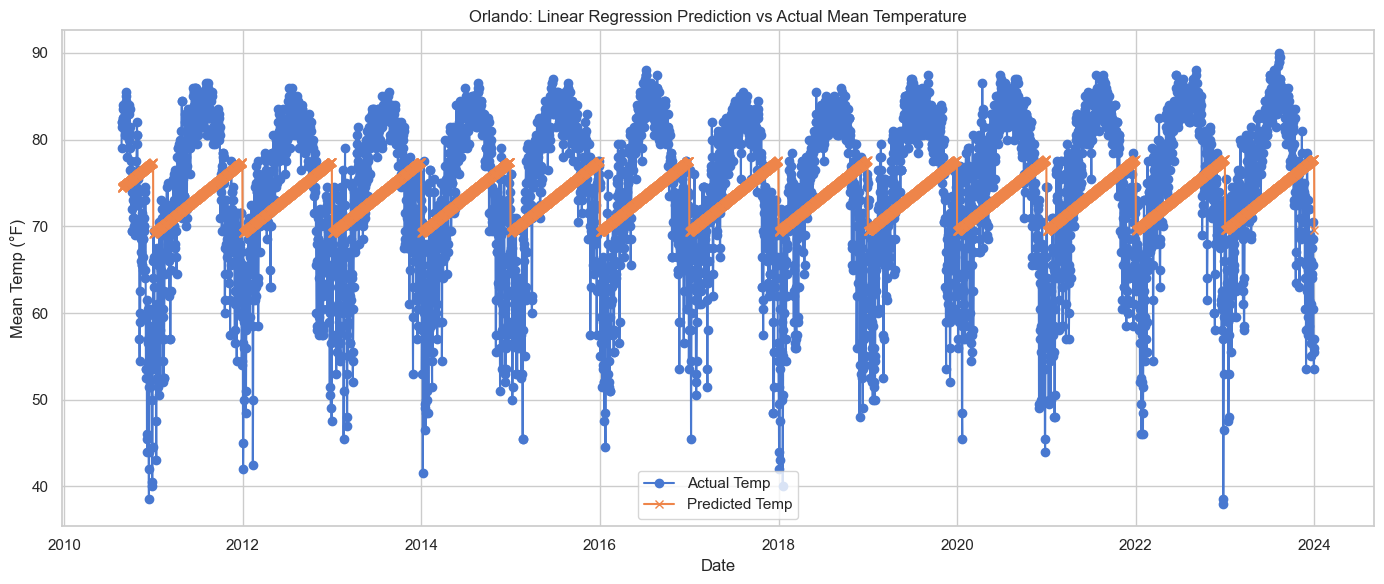

Linear Regression Model for Tampa:
  Coefficients: [0.0209118  0.01136597]
  Intercept: 46.46891297867766
  R-squared on test set: 0.02583310269253969
  Mean Squared Error (MSE): 88.3050



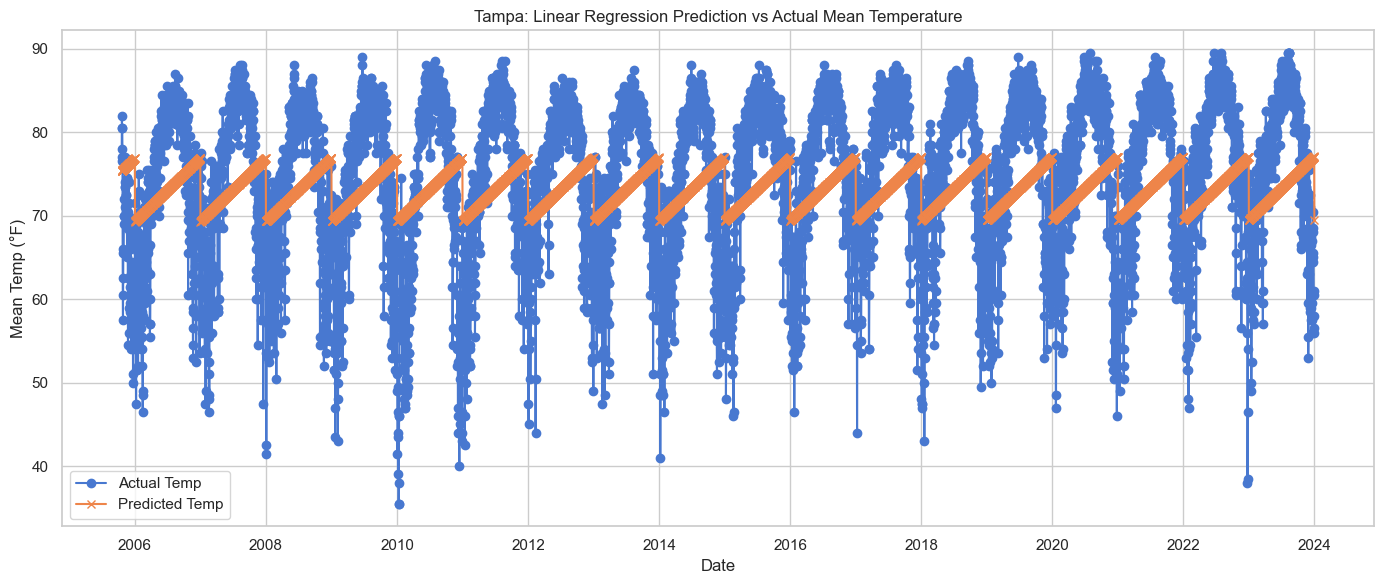

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
for city in cities:
    # sort the data and filter it
    city_lr = combined_df_clean[combined_df_clean['City'] == city].copy().sort_values("Date")
    #when using regression i need it to be date based
    city_lr['day_of_year'] = city_lr['Date'].dt.dayofyear
    city_lr['year'] = city_lr['Date'].dt.year
    X = city_lr[['day_of_year', 'year']]
    y = city_lr['MEAN TEMP']
    # split the data between training and testing (might mess around with this more)
    split_index = int(len(city_lr) * 0.8)
    X_train = X.iloc[:split_index]
    X_test = X.iloc[split_index:]
    y_train = y.iloc[:split_index]
    y_test = y.iloc[split_index:]
    #training stuff
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    # evaluation with r squared
    r2 = lr_model.score(X_test, y_test)
    mse_lm = mean_squared_error(y_test, lr_model.predict(X_test))
    print(f"Linear Regression Model for {city}:")
    print("  Coefficients:", lr_model.coef_)
    print("  Intercept:", lr_model.intercept_)
    print("  R-squared on test set:", r2)
    print(f"  Mean Squared Error (MSE): {mse_lm:.4f}\n")
    #difference between what the actual is vs the predicted temp
    plt.figure(figsize=(14, 6))
    plt.plot(city_lr['Date'].iloc[split_index:], y_test, marker='o', label="Actual Temp")
    plt.plot(city_lr['Date'].iloc[split_index:], lr_model.predict(X_test), marker='x', label="Predicted Temp")
    plt.title(f"{city}: Linear Regression Prediction vs Actual Mean Temperature")
    plt.xlabel("Date")
    plt.ylabel("Mean Temp (°F)")
    plt.legend()
    plt.tight_layout()
    plt.show()

100% (20 of 20) |########################| Elapsed Time: 0:00:03 Time:  0:00:030000


GAM Model for Panama City:
  R-squared on test set: 0.6663

  Mean Squared Error (MSE): 40.0071



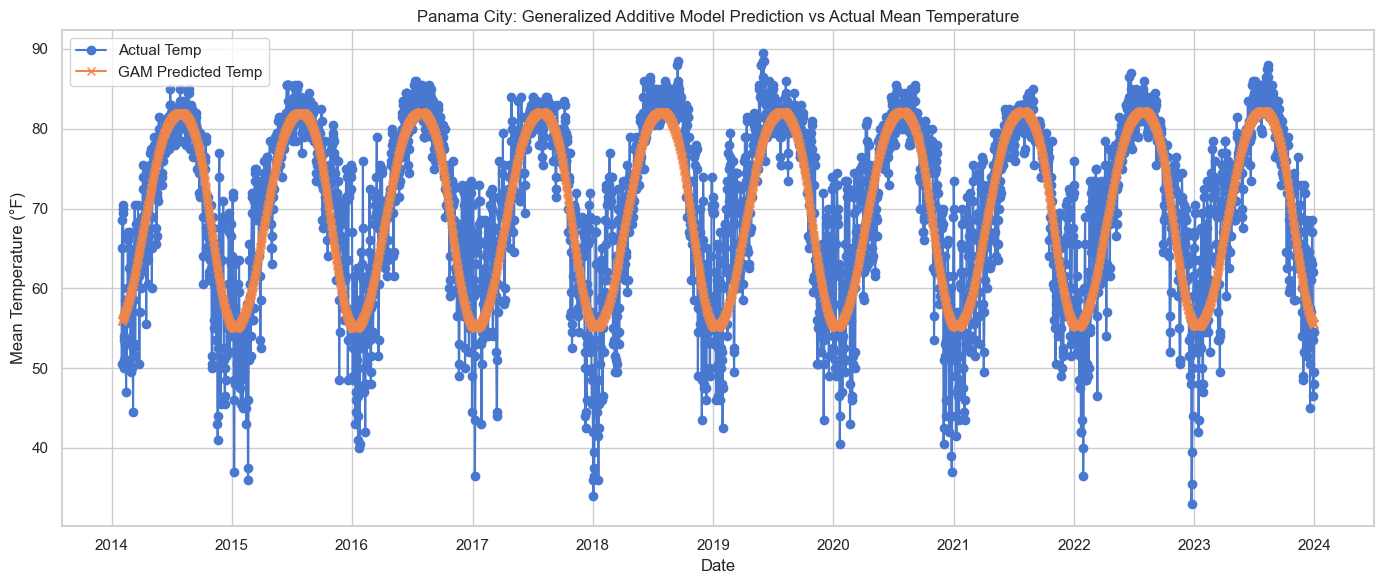

100% (20 of 20) |########################| Elapsed Time: 0:00:03 Time:  0:00:030000


GAM Model for Gainesville:
  R-squared on test set: 0.5516

  Mean Squared Error (MSE): 66.6649



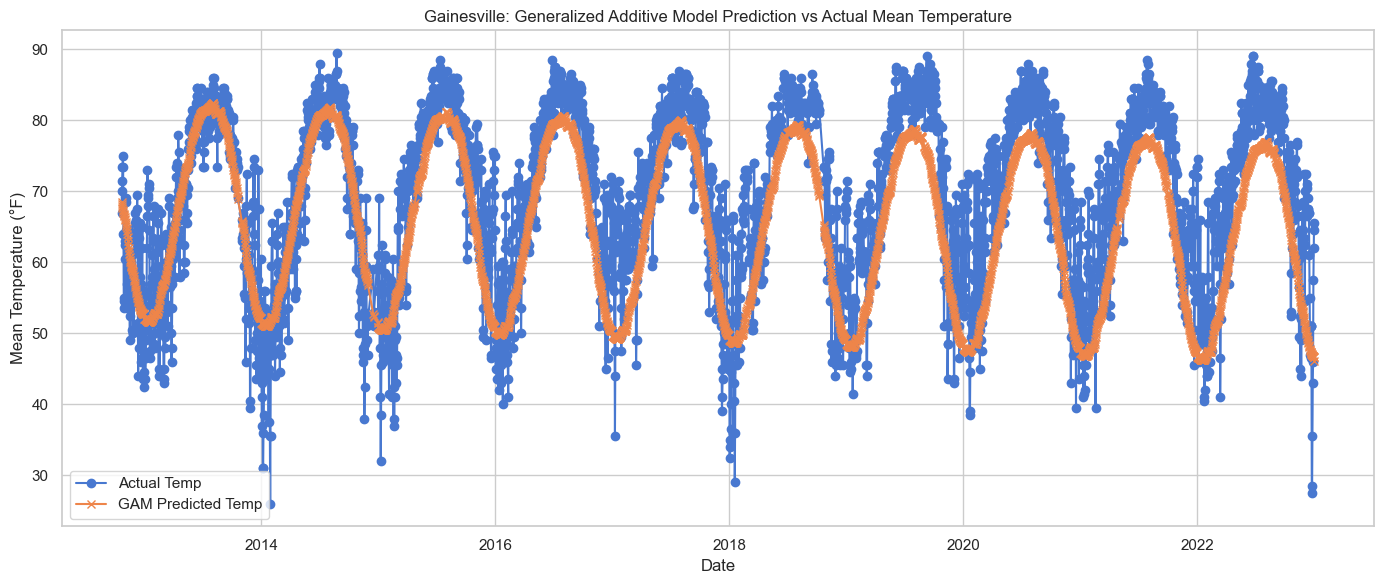

100% (20 of 20) |########################| Elapsed Time: 0:00:05 Time:  0:00:050000


GAM Model for Miami:
  R-squared on test set: 0.6013

  Mean Squared Error (MSE): 18.7242



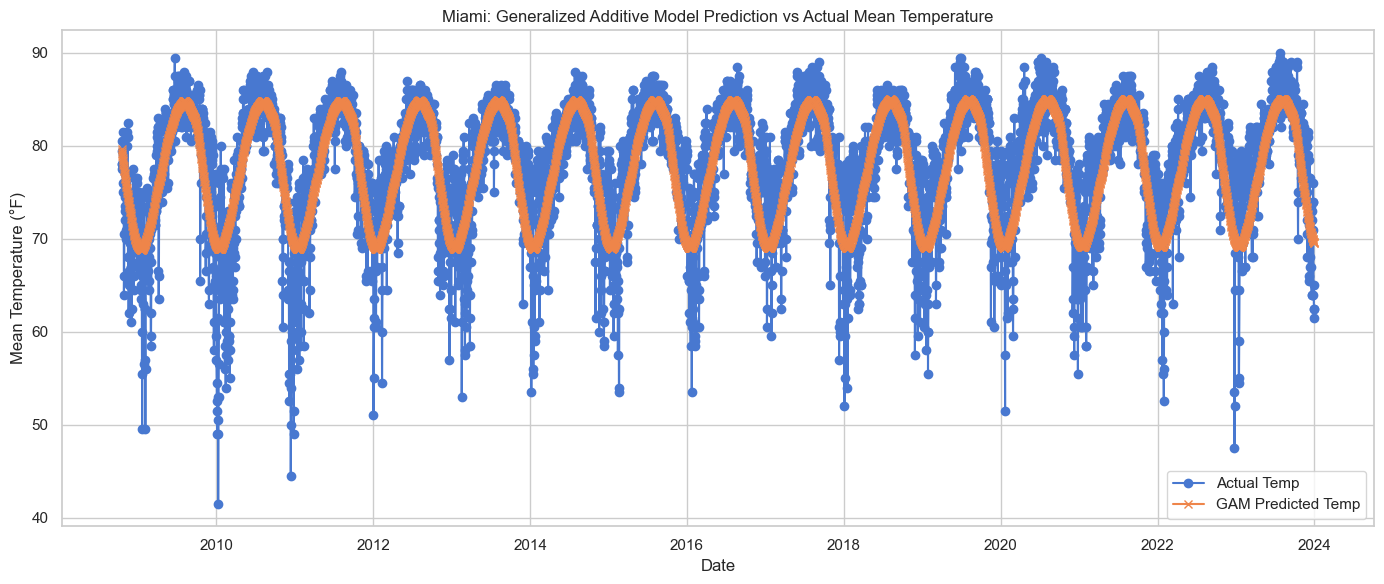

100% (20 of 20) |########################| Elapsed Time: 0:00:05 Time:  0:00:050000


GAM Model for Orlando:
  R-squared on test set: 0.5975

  Mean Squared Error (MSE): 33.6939



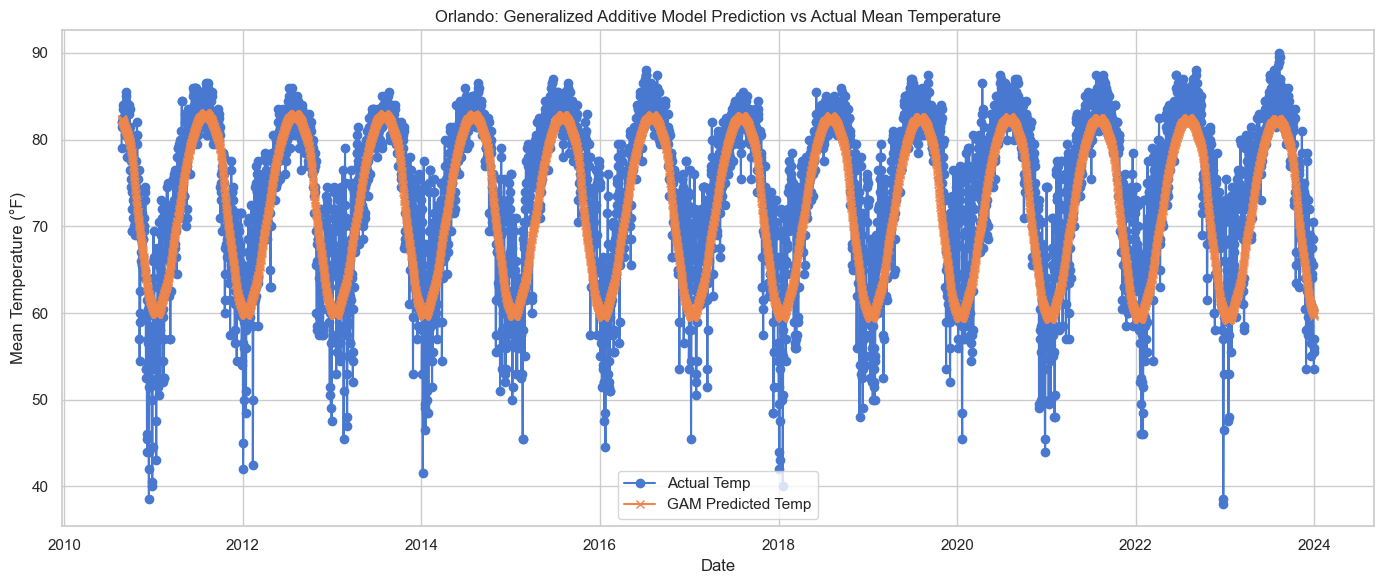

100% (20 of 20) |########################| Elapsed Time: 0:00:11 Time:  0:00:110001


GAM Model for Tampa:
  R-squared on test set: 0.5676

  Mean Squared Error (MSE): 39.1996



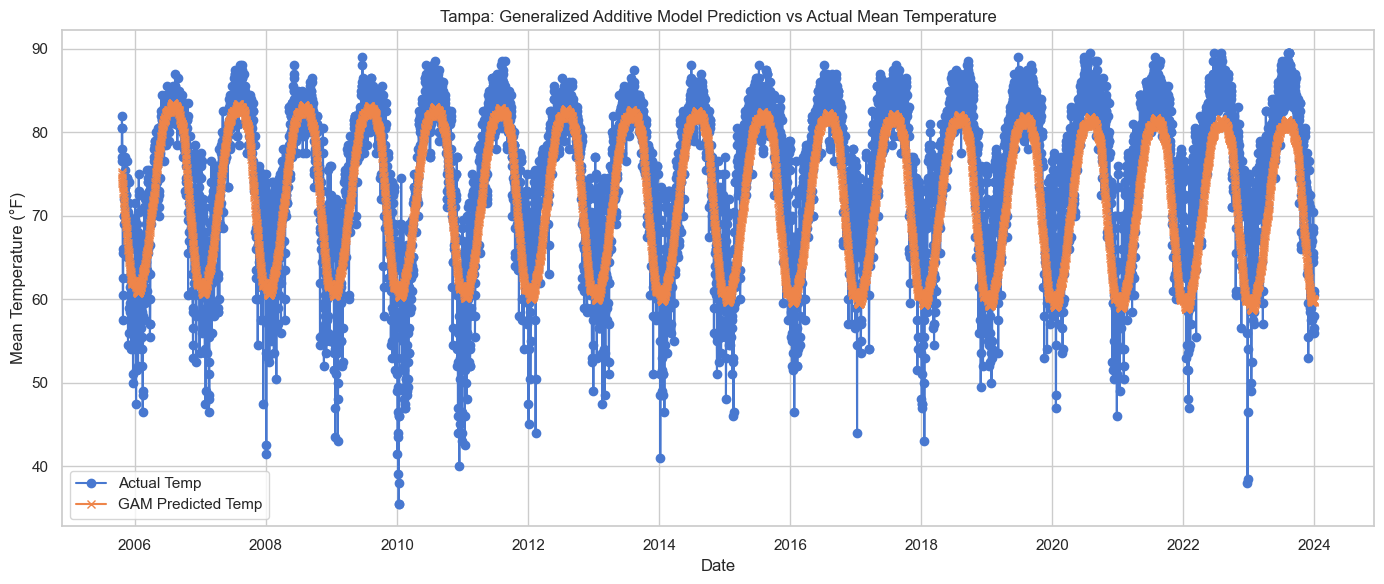

In [13]:
import scipy.sparse as sp
if not hasattr(sp.spmatrix, "A"):
    sp.spmatrix.A = property(lambda self: self.toarray())

import numpy as np
from pygam import LinearGAM, s
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# go through the cities and apply the GAM model
for city in cities:
    city_data = combined_df_clean[combined_df_clean['City'] == city].copy().sort_values("Date")
    city_data['day_of_year'] = city_data['Date'].dt.dayofyear
    city_data['year'] = city_data['Date'].dt.year
    # start year at 0
    city_data['year_centered'] = city_data['year'] - city_data['year'].min()
    city_data['sin_day'] = np.sin(2 * np.pi * city_data['day_of_year'] / 365)
    city_data['cos_day'] = np.cos(2 * np.pi * city_data['day_of_year'] / 365)
    #label the predictors
    X = city_data[['sin_day', 'cos_day', 'year_centered']]
    y = city_data['MEAN TEMP']
    #80/20 training model
    split_index = int(len(city_data) * 0.8)
    X_train = X.iloc[:split_index]
    X_test = X.iloc[split_index:]
    y_train = y.iloc[:split_index]
    y_test = y.iloc[split_index:]
    #fit gam without cyclical keyword
    gam = LinearGAM(
        s(0, n_splines=12) +
        s(1, n_splines=12) +
        s(2, n_splines=6)
    )
    #expand grid search
    gam.gridsearch(X_train.values, y_train.values, lam=np.logspace(-5, 5, 20))
    #use dense array
    y_pred = gam.predict(X_test.values)
    #if too seperate use sparse
    if hasattr(y_pred, "toarray"):
        y_pred = y_pred.toarray().flatten()
    #calculate r squared
    r2_gam = r2_score(y_test, y_pred)
    mse_gam = mean_squared_error(y_test, y_pred)
    print(f"GAM Model for {city}:")
    print(f"  R-squared on test set: {r2_gam:.4f}\n")
    print(f"  Mean Squared Error (MSE): {mse_gam:.4f}\n")
    #actual vs gam
    plt.figure(figsize=(14, 6))
    plt.plot(city_data['Date'].iloc[split_index:], y_test, marker='o', label="Actual Temp")
    plt.plot(city_data['Date'].iloc[split_index:], y_pred, marker='x', label="GAM Predicted Temp")
    plt.title(f"{city}: Generalized Additive Model Prediction vs Actual Mean Temperature")
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature (°F)")
    plt.legend()
    plt.tight_layout()
    plt.show()


C:\Users\rageq\PyCharmMiscProject\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\rageq\PyCharmMiscProject\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Panama City: RMSE=8.83   R²=0.366


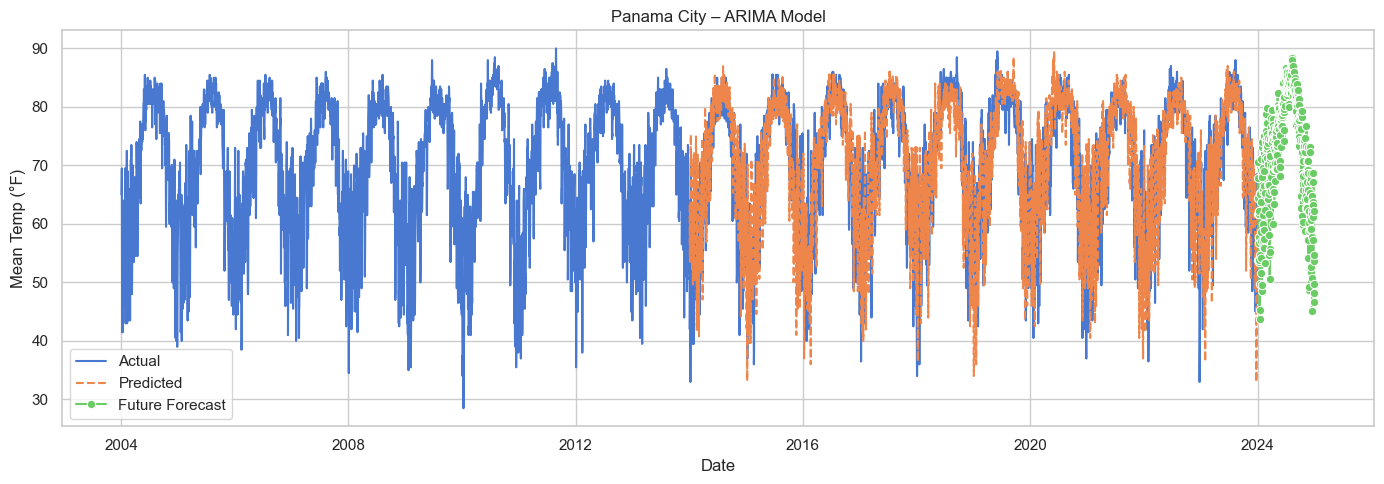

Gainesville: RMSE=8.48   R²=0.513


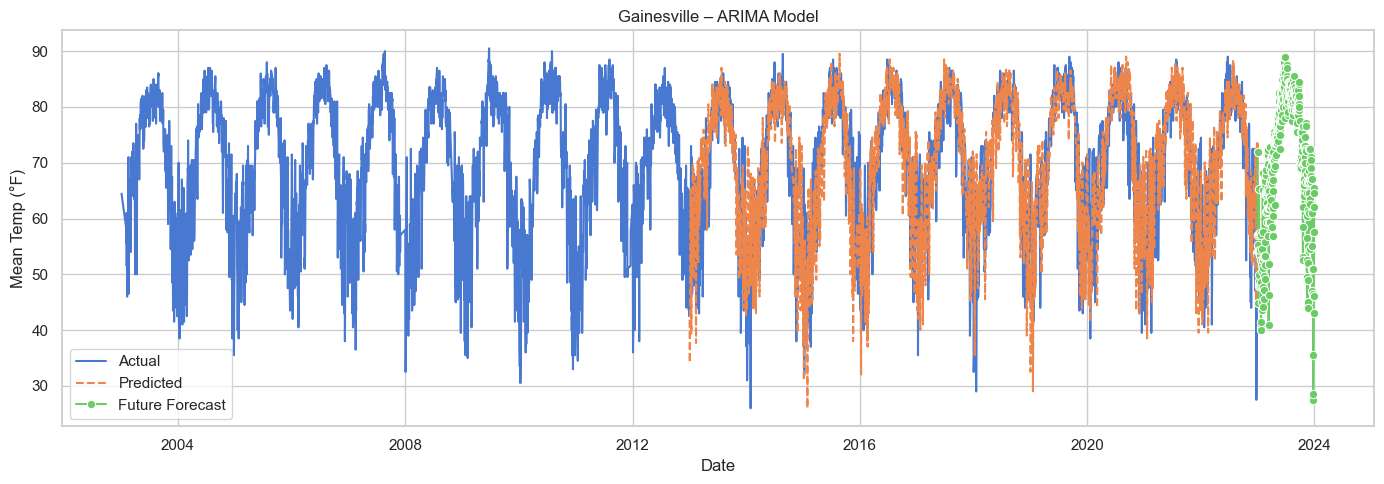

Miami: RMSE=5.62   R²=0.243


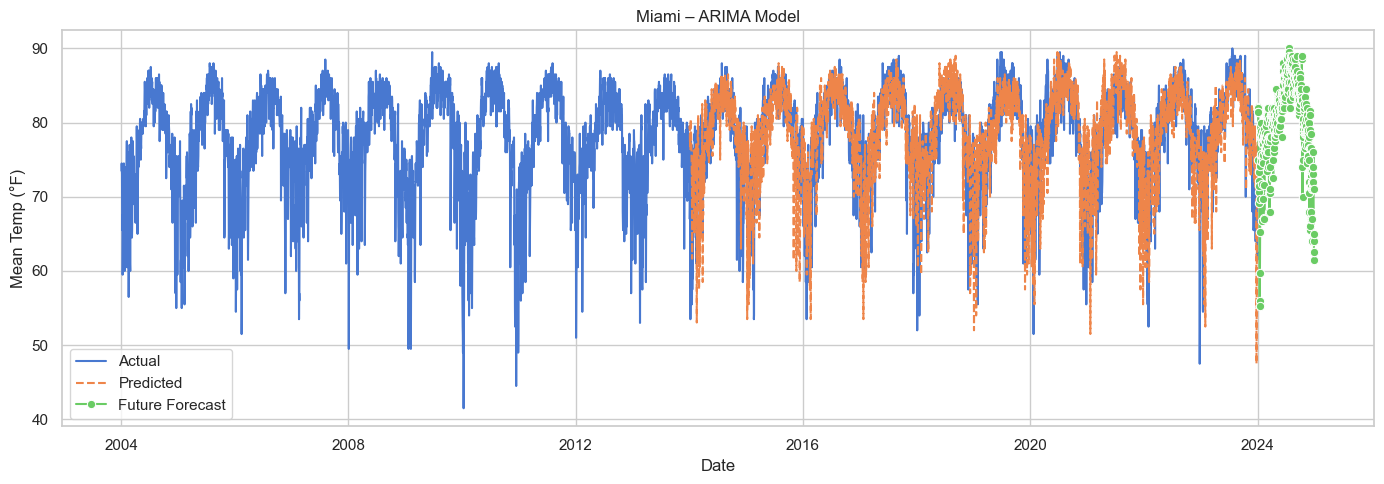

C:\Users\rageq\PyCharmMiscProject\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\rageq\PyCharmMiscProject\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Orlando: RMSE=7.33   R²=0.348


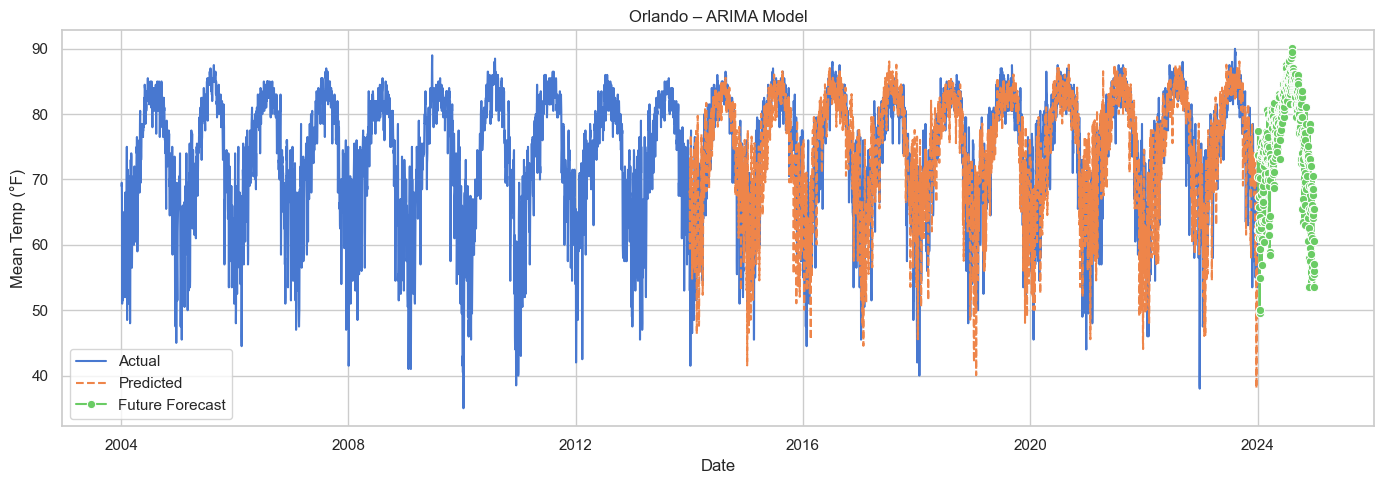

Tampa: RMSE=7.23   R²=0.381


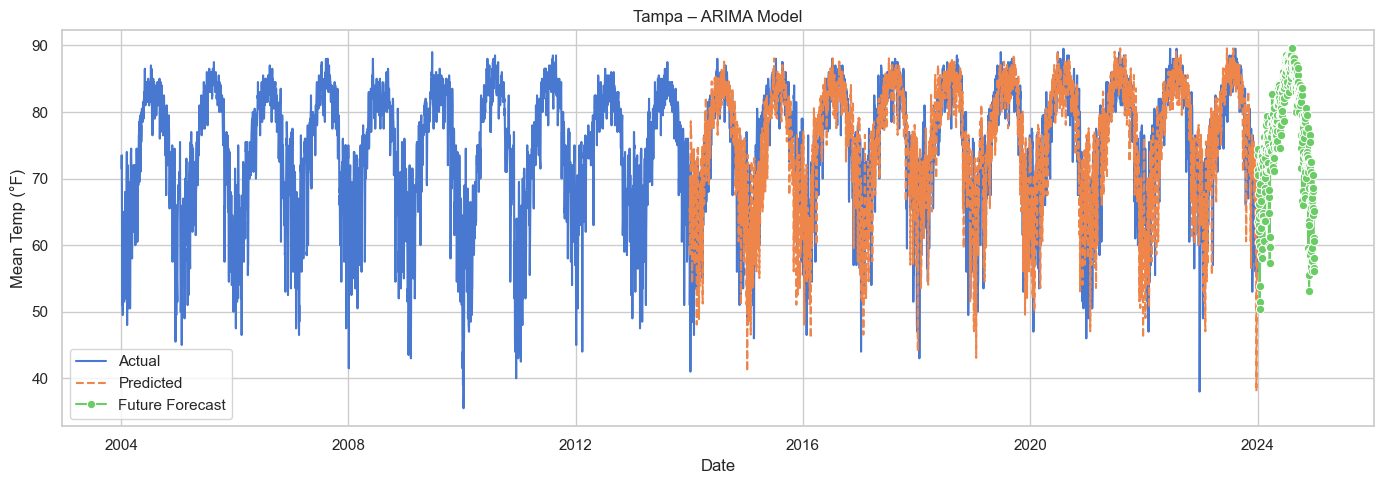

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (14, 5)

TEST_DAYS = 3652  # 10 years
FORECAST_DAYS = 365  # 1 year out into the future

for city in combined_df_clean["City"].unique():
    ts = (combined_df_clean.loc[combined_df_clean["City"] == city].sort_values("Date").set_index("Date")["MEAN TEMP"].asfreq("D").interpolate("time"))

    diff365 = ts - ts.shift(365)
    diff365 = diff365.dropna()

    train, test = diff365[:-TEST_DAYS], diff365[-TEST_DAYS:]

    model = ARIMA(train, order=(2, 0, 2)).fit()

    diff_preds = model.predict(start=len(train), end=len(diff365)-1)
    base_series = ts.shift(365)  # last‑year temps
    preds = diff_preds + base_series[-TEST_DAYS:]

    rmse = np.sqrt(mean_squared_error(ts[-TEST_DAYS:], preds))
    r2   = r2_score(ts[-TEST_DAYS:], preds)
    print(f"{city}: RMSE={rmse:.2f}   R²={r2:.3f}")

    future_diffs = model.forecast(steps=FORECAST_DAYS)
    future_baseline = ts.iloc[-365:]
    future = future_diffs.values + future_baseline.values
    future_index = pd.date_range(start=ts.index[-1] + pd.Timedelta(days=1), periods=FORECAST_DAYS, freq="D")
    future = pd.Series(future, index=future_index)

    plt.figure()
    sns.lineplot(x=ts.index[-2*TEST_DAYS:], y=ts[-2*TEST_DAYS:], label="Actual")
    sns.lineplot(x=preds.index, y=preds, label="Predicted", linestyle="--")
    sns.lineplot(x=future.index, y=future, label="Future Forecast", marker="o")
    plt.title(f"{city} – ARIMA Model")
    plt.xlabel("Date")
    plt.ylabel("Mean Temp (°F)")
    plt.tight_layout()
    plt.show()

Panama City: RMSE=0.61   R²=-0.906


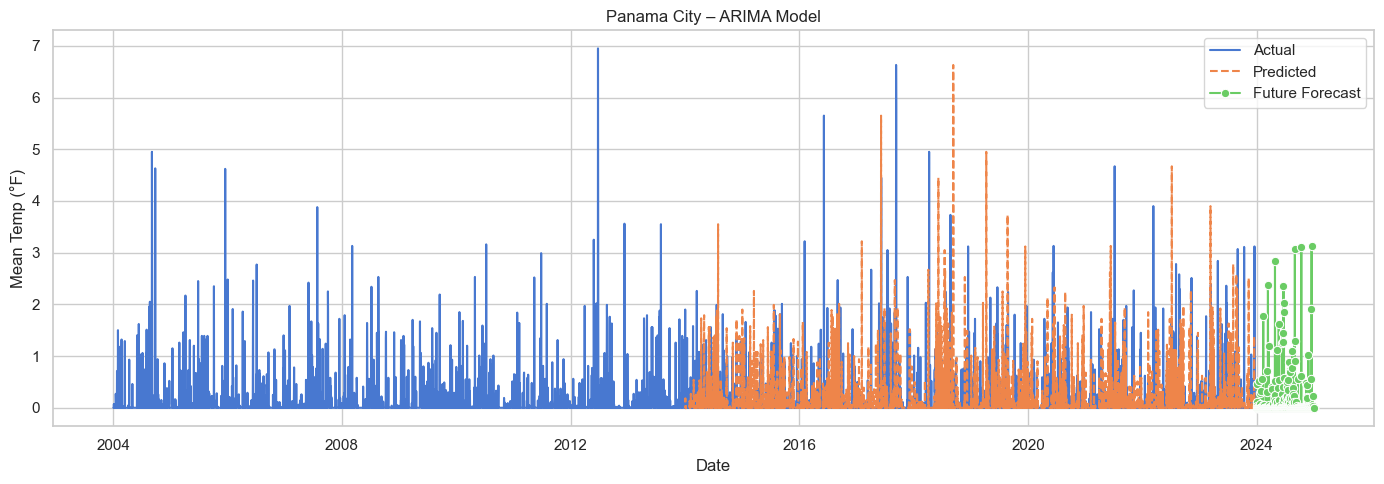

Gainesville: RMSE=0.75   R²=-1.000


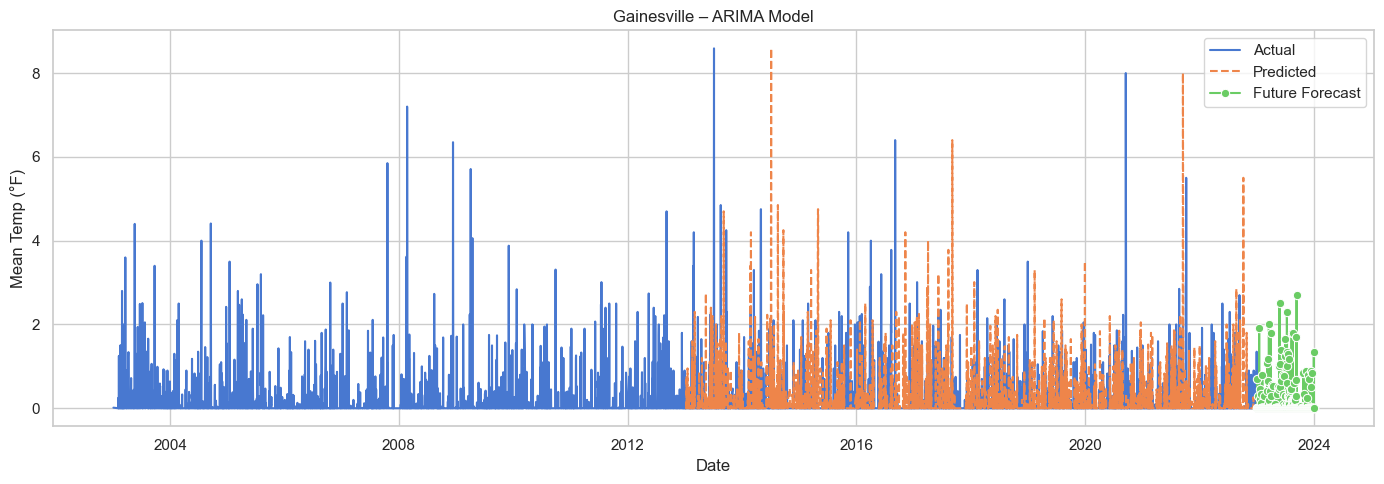

Miami: RMSE=0.72   R²=-0.908


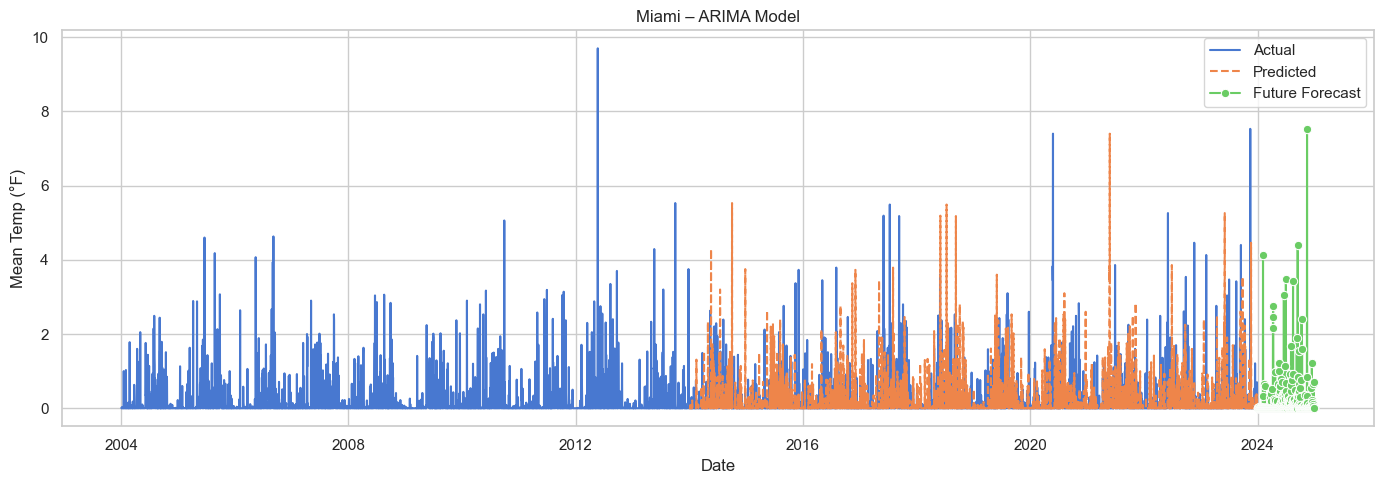

Orlando: RMSE=0.59   R²=-0.938


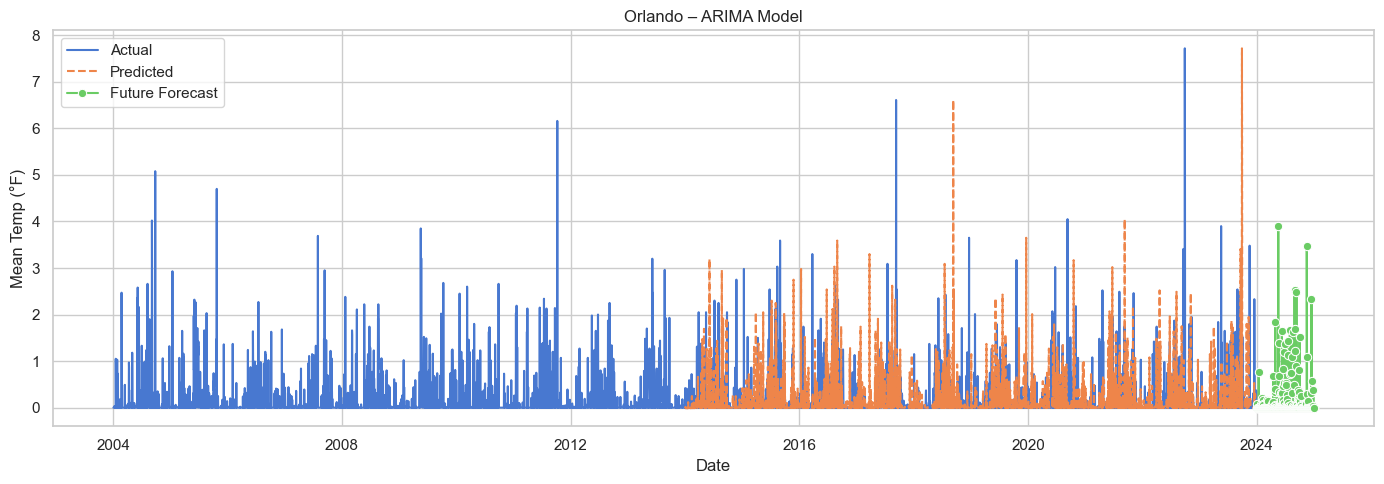

Tampa: RMSE=0.61   R²=-0.966


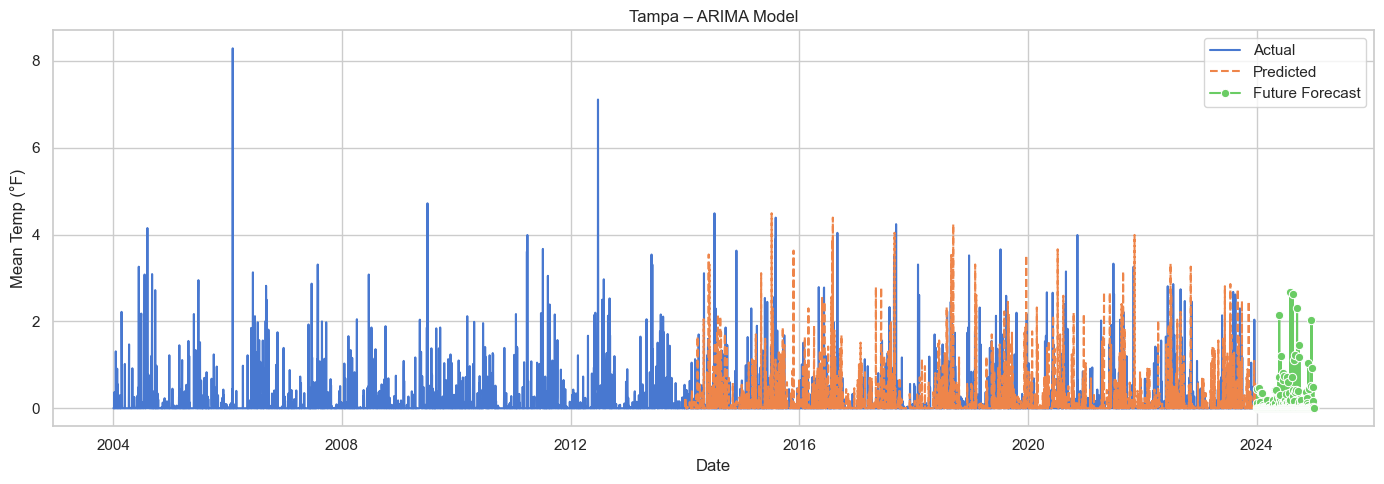

In [15]:
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (14, 5)

TEST_DAYS = 3652  # 10 years
FORECAST_DAYS = 365  # 1 year out into the future

for city in combined_df_clean["City"].unique():
    ts = (combined_df_clean.loc[combined_df_clean["City"] == city].sort_values("Date").set_index("Date")["PRECIPITATION"].asfreq("D").interpolate("time"))

    diff365 = ts - ts.shift(365)
    diff365 = diff365.dropna()

    train, test = diff365[:-TEST_DAYS], diff365[-TEST_DAYS:]

    model = ARIMA(train, order=(2, 0, 2)).fit()

    diff_preds = model.predict(start=len(train), end=len(diff365)-1)
    base_series = ts.shift(365)  # last‑year temps
    preds = diff_preds + base_series[-TEST_DAYS:]

    rmse = np.sqrt(mean_squared_error(ts[-TEST_DAYS:], preds))
    r2   = r2_score(ts[-TEST_DAYS:], preds)
    print(f"{city}: RMSE={rmse:.2f}   R²={r2:.3f}")

    future_diffs = model.forecast(steps=FORECAST_DAYS)
    future_baseline = ts.iloc[-365:]
    future = future_diffs.values + future_baseline.values
    future_index = pd.date_range(start=ts.index[-1] + pd.Timedelta(days=1), periods=FORECAST_DAYS, freq="D")
    future = pd.Series(future, index=future_index)

    plt.figure()
    sns.lineplot(x=ts.index[-2*TEST_DAYS:], y=ts[-2*TEST_DAYS:], label="Actual")
    sns.lineplot(x=preds.index, y=preds, label="Predicted", linestyle="--")
    sns.lineplot(x=future.index, y=future, label="Future Forecast", marker="o")
    plt.title(f"{city} – ARIMA Model")
    plt.xlabel("Date")
    plt.ylabel("Mean Temp (°F)")
    plt.tight_layout()
    plt.show()